# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

from google.colab import drive

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [2]:
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/data/Dataset_clustering.csv')
print(df.head())

Mounted at /content/drive
  provinsi    jenis     daerah   tahun    periode        gk  Cluster
0     ACEH  MAKANAN  PERKOTAAN  2015.0      MARET  293697.0        0
1     ACEH  MAKANAN  PERKOTAAN  2015.0  SEPTEMBER  302128.0        1
2     ACEH  MAKANAN  PERKOTAAN  2016.0      MARET  306243.0        0
3     ACEH  MAKANAN  PERKOTAAN  2016.0  SEPTEMBER  319768.0        1
4     ACEH  MAKANAN  PERDESAAN  2015.0      MARET  297479.0        0


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [13]:
X = df.select_dtypes(include=['number']).drop(columns=['Cluster'])
y = df['Cluster']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Jumlah data latih:", X_train.shape[0])
print("Jumlah data uji:", X_test.shape[0])

Jumlah data latih: 4150
Jumlah data uji: 1038


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [4]:
rf = RandomForestClassifier(n_estimators=50, max_depth=10, min_samples_split=10,  min_samples_leaf=5, random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)

lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

Random Forest adalah metode berbasis ensemble yang membangun beberapa pohon keputusan dan menggabungkan prediksinya untuk meningkatkan akurasi dan mengurangi overfitting.

Linear Regression adalah model linear yang digunakan untuk memprediksi probabilitas suatu kelas berdasarkan hubungan logistik antara variabel independen dan target.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

In [26]:
y_pred_rf_test = rf.predict(X_test_scaled)
y_pred_lr_test = lr.predict(X_test_scaled)

accuracy_rf_test = accuracy_score(y_test, y_pred_rf_test)
f1_rf_test = f1_score(y_test, y_pred_rf_test, average='weighted')

print("**Random Forest**")
print(f"Accuracy: {accuracy_rf_test:.4f}")
print(f"F1-Score: {f1_rf_test:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_rf_test))

accuracy_lr_test = accuracy_score(y_test, y_pred_lr_test)
f1_lr_test = f1_score(y_test, y_pred_lr_test, average='weighted')

print("\n**Logistic Regression**")
print(f"Accuracy: {accuracy_lr_test:.4f}")
print(f"F1-Score: {f1_lr_test:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_lr_test))

**Random Forest**
Accuracy: 0.4836
F1-Score: 0.4820
Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.58      0.54       354
           1       0.51      0.45      0.48       348
           2       0.42      0.40      0.41       168
           3       0.43      0.44      0.43       168

    accuracy                           0.48      1038
   macro avg       0.47      0.47      0.47      1038
weighted avg       0.48      0.48      0.48      1038


**Logistic Regression**
Accuracy: 0.5067
F1-Score: 0.5015
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.60      0.55       354
           1       0.50      0.40      0.44       348
           2       0.53      0.41      0.46       168
           3       0.51      0.62      0.56       168

    accuracy                           0.51      1038
   macro avg       0.51      0.51      0.50      1038
weighted avg       0.51     

In [15]:
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=set(y_true), yticklabels=set(y_true))
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

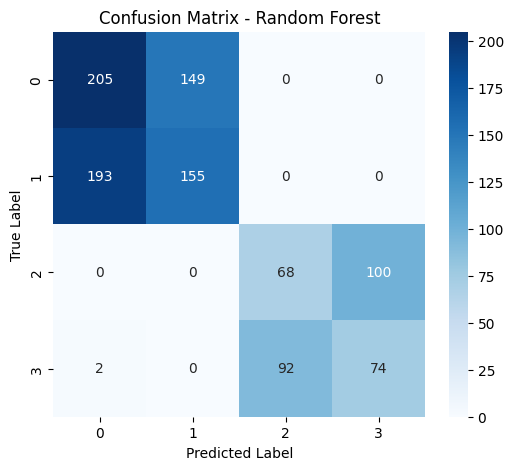

In [16]:
plot_confusion_matrix(y_test, y_pred_rf, "Random Forest")

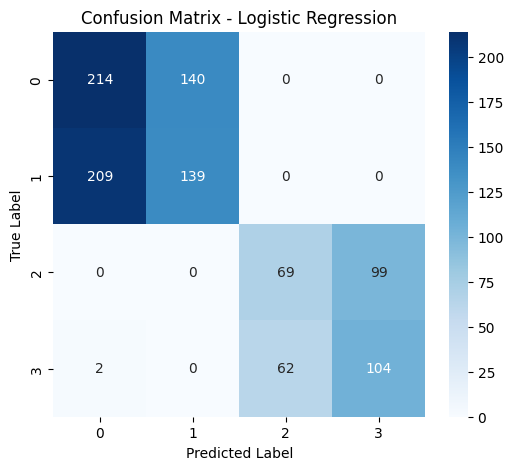

In [17]:
plot_confusion_matrix(y_test, y_pred_lr, "Logistic Regression")

Random Forest Evaluation  
**Accuracy: `0.4836`**  
**F1-Score: `0.4820`**   

Logistic Regression Evaluation  
**Accuracy: `0.5067`**  
**F1-Score: `0.5015`**

Hasil evaluasi menunjukkan bahwa **Logistic Regression memberikan performa yang lebih baik** dibandingkan** Random Forest** berdasarkan hasil akurasi dan F1-score. Logistic Regression mencapai akurasi lebih tinggi sebesar **50.67% dibandingkan Random Forest dengan akurasi 48.36%**. Hal yang sama berlaku untuk F1-score, di mana **Logistic Regression mencapai 0.5015 dibandingkan 0.4820 pada Random Forest**.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [19]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

print("Best Params:", grid_search.best_params_)

Best Params: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}


In [23]:
param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}


random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=20,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42
)

random_search.fit(X_train_scaled, y_train)

print("Best Params:", random_search.best_params_)

Best Params: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': None}


## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [21]:
best_rf = RandomForestClassifier(max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=100, random_state=42)
best_rf.fit(X_train_scaled, y_train)

y_pred_best_rf = best_rf.predict(X_test_scaled)

In [24]:
accuracy = accuracy_score(y_test, y_pred_best_rf)
f1 = f1_score(y_test, y_pred_best_rf, average='weighted')

print(f"Accuracy after tuning: {accuracy:.4f}")
print(f"F1-Score after tuning: {f1:.4f}")

print("Classification Report after tuning:")
print(classification_report(y_test, y_pred_best_rf))

Accuracy after tuning: 0.4942
F1-Score after tuning: 0.4934
Classification Report after tuning:
              precision    recall  f1-score   support

           0       0.50      0.54      0.52       354
           1       0.50      0.46      0.48       348
           2       0.48      0.45      0.46       168
           3       0.48      0.51      0.50       168

    accuracy                           0.49      1038
   macro avg       0.49      0.49      0.49      1038
weighted avg       0.49      0.49      0.49      1038



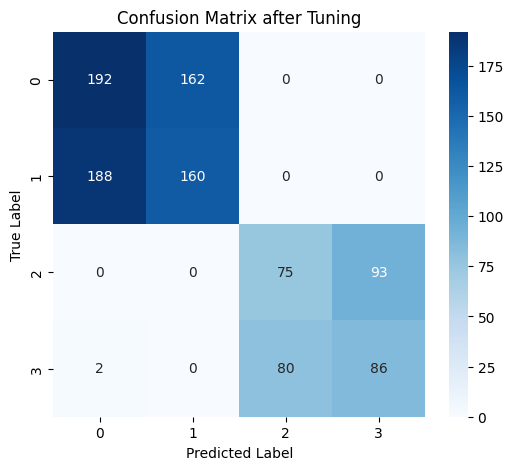

In [25]:
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, y_pred_best_rf), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix after Tuning")
plt.show()

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Rekomendasi Evaluasi Model Random Forest

1. Perbandingan Hasil Evaluasi Sebelum dan Setelah Tuning
  - **Sebelum Tuning:**
    - **Akurasi:** 0.4836  
    - **F1-Score:** 0.4820  

  - **Setelah Tuning:**
    - **Akurasi:** 0.4942  
    - **F1-Score:** 0.4934  

Kesimpulan:
  - Setelah tuning, model mengalami **sedikit peningkatan performa** dari segi akurasi dan F1-score.
  - Hal ini menunjukkan bahwa tuning parameter telah membantu model menangkap pola data lebih baik, meskipun peningkatannya tidak terlalu besar.
  - **Tidak ada indikasi overfitting**, karena hasil akurasi dan F1-score tetap cukup konsisten antara sebelum dan setelah tuning.

---

2. Analisis Classification Report
  - **Precision dan Recall pada setiap kelas cukup seimbang**, yang berarti model bekerja stabil dalam memprediksi berbagai kelas.
  - **F1-score pada kelas 2 dan 3 menunjukkan performa lebih rendah** dibandingkan kelas lainnya, yang perlu diperhatikan lebih lanjut.

---

3. Rekomendasi Langkah Lanjutan
Berikut adalah langkah-langkah yang dapat dilakukan untuk meningkatkan performa model:
  1. **Kumpulkan Lebih Banyak Data:**  
    Tambahkan data latih, terutama untuk kelas dengan jumlah data yang mungkin lebih sedikit dan menyebabkan F1-score rendah.

  2. **Coba Algoritma Lain:**  
    Algoritma seperti **Gradient Boosting** atau **XGBoost** mungkin dapat memberikan peningkatan performa yang lebih signifikan pada dataset ini.

  3. **Gunakan Teknik Balancing:**  
    Jika terdapat ketidakseimbangan jumlah data antar kelas, pertimbangkan untuk menggunakan **SMOTE (Synthetic Minority Oversampling Technique)** atau metode balancing lainnya.

  4. **Lakukan Tuning Lebih Lanjut:**  
      - Perluas ruang pencarian parameter, atau tingkatkan jumlah iterasi pada tuning dengan `RandomizedSearchCV`.  
      - Ini akan membantu model menemukan kombinasi parameter yang lebih optimal.